In [30]:
import os
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(13)

In [ ]:
CURR_DIR = os.getcwd()
df = pd.DataFrame(columns=['Text', 'Label'])
print(CURR_DIR)
def load_texts():
    for sub_path in os.listdir(CURR_DIR + '/hackaton_data'):
        load_doc(CURR_DIR + '/hackaton_data/' , sub_path)
        print(sub_path)

In [ ]:
# load doc into memory
def load_doc(filename, sub_path):
  
 global df
 
 temp_df = pd.read_csv(filename + sub_path, sep="\n", header=None, names=['Text', 'Label'],encoding='utf-8')
 temp_df['Label'] = sub_path.split('.')[0]
 df = df.append(temp_df, ignore_index=True)
# return temp_df

In [ ]:
df.head()

In [ ]:
# print

count = 0
for text in df['Text']:
    print(text)
    print('\n')
    count = count + 1
    if count == 20:
        break

In [ ]:
STOPWORDS_DIR = './merged_stopwords_tr_extended.txt'

with open(STOPWORDS_DIR, 'r') as f:
    tr_stop_words = [line.strip() for line in f]

In [ ]:
# Text Cleaning & Feature Engineering
punc_pool = string.punctuation
punc_pool = punc_pool + '’'

def clean_text(text):
    
    # ilk baştaki pre-label taglarını sil.
    label_pattern = ['__label__life', '__label__economics', '__label__health', '__label__sports', '__label__technology']
    for label in label_pattern:
        text = re.sub(label, '', text)
    
    # Para birimleri handling
    money_sign_pool = ['$', '€', '£', '₺', 'tl']
    text = "".join([' parabirimi ' if ltr in money_sign_pool else ltr for ltr in text])
 #   print(text) 
    
    # Remove Punctuations ? remove : count
    re_punct = re.compile('[%s]' % re.escape(punc_pool))
    text = re_punct.sub(' ', text)
    
    # Tokenize et
    tokens = text.split(' ')
    
    # Capital İ handling
    tokens = [re.sub("İ","i",token) for token in tokens]
    
    #Digit handling
    
    tokens = [re.sub(r'\b\d+\b', 'numeric', token.lower()) for token in tokens]
    
    # Remove Stopwords
    tokens = [w for w in tokens if w not in tr_stop_words]
 #   print(tokens)

    tokens = [token for token in tokens if len(token) > 2]
    
    pattern = re.compile(r'\s+')
    sentence = re.sub(pattern, ' ', ' '.join(tokens))
    
    return sentence

In [ ]:
(df[df['Label'] == 'economics']['Text'].to_list())[1]

In [ ]:
clean_text((df[df['Label'] == 'economics']['Text'].to_list())[1])

In [ ]:
df['Text'] = df['Text'].apply(lambda x: clean_text(x))

In [ ]:
df.head()

In [ ]:
clean_df_backup = df.copy()

In [ ]:
clean_df_backup.to_csv('clean_df.csv')

In [3]:
df = pd.read_csv('clean_df.csv')

In [100]:
len(df)

1120000

# Split Data as Train / Test

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    df['Text'], df['Label'], test_size=0.05, random_state=13)

In [5]:
len(X_train)

1064000

In [71]:
X_train.head()

747409    belli cinsiyetin istihdamını zorunlu kılan dur...
96136     zeki kuneralp numeric yılında üniversiteyi yur...
184627    kahvaltı masasını hazırlamak masanın üstündeki...
734631    numeric dolar numeric dolar arasındaki dar ban...
70915     türkiyenin onuru gongu ağızlarda çalmaya başla...
Name: Text, dtype: object

In [6]:
X_train.head()

747409    belli cinsiyetin istihdamını zorunlu kılan dur...
96136     zeki kuneralp numeric yılında üniversiteyi yur...
184627    kahvaltı masasını hazırlamak masanın üstündeki...
734631    numeric dolar numeric dolar arasındaki dar ban...
70915     türkiyenin onuru gongu ağızlarda çalmaya başla...
Name: Text, dtype: object

In [7]:
y_test.value_counts()

life          12867
health        11535
economics     11162
sports        10406
technology    10030
Name: Label, dtype: int64

# TOKENIZE DOCS & ENCODE SEQUENCES ALL

In [8]:
X_train

747409     belli cinsiyetin istihdamını zorunlu kılan dur...
96136      zeki kuneralp numeric yılında üniversiteyi yur...
184627     kahvaltı masasını hazırlamak masanın üstündeki...
734631     numeric dolar numeric dolar arasındaki dar ban...
70915      türkiyenin onuru gongu ağızlarda çalmaya başla...
                                 ...                        
668916               kalsiyum deposu dişler süt süt ürünleri
844698     tüketiciler birliği başkanı aydın ağaoğlu kred...
256742     toms kadın erkek ayakkabıları uygun fiyatlarla...
253456     torunu kaan uyuturken sohbet ettiğimiz pelin h...
1015882    yıl alan adından reklam vererek numeric dolar ...
Name: Text, Length: 1064000, dtype: object

In [72]:
from keras.preprocessing.text import Tokenizer

t = Tokenizer()
t.fit_on_texts(X_train.astype(str))
vocab_size = len(t.word_index) + 1

In [73]:
t.word_index

{'numeric': 1,
 'yeni': 2,
 'türkiye': 3,
 'ilk': 4,
 'yüzde': 5,
 'nin': 6,
 'büyük': 7,
 'son': 8,
 'iyi': 9,
 'nın': 10,
 'önemli': 11,
 'yer': 12,
 'yıl': 13,
 'fazla': 14,
 'dedi': 15,
 'arasında': 16,
 'devam': 17,
 'aynı': 18,
 'zaman': 19,
 'içinde': 20,
 'fenerbahçe': 21,
 'gün': 22,
 'galatasaray': 23,
 'şekilde': 24,
 'sahip': 25,
 'geçen': 26,
 'yüksek': 27,
 'özel': 28,
 'söyledi': 29,
 'ortaya': 30,
 'teknik': 31,
 'istanbul': 32,
 'özellikle': 33,
 'farklı': 34,
 'gelen': 35,
 'ardından': 36,
 'alan': 37,
 'başkanı': 38,
 'beşiktaş': 39,
 'türk': 40,
 'karşı': 41,
 'uzun': 42,
 'olacak': 43,
 'ifade': 44,
 'para': 45,
 'dikkat': 46,
 'avrupa': 47,
 'ikinci': 48,
 'nun': 49,
 'üzerinde': 50,
 'konuştu': 51,
 'genel': 52,
 'artık': 53,
 'üzerine': 54,
 'bulunan': 55,
 'sarı': 56,
 'takım': 57,
 'dolar': 58,
 'başka': 59,
 'konusunda': 60,
 'yılında': 61,
 'sezon': 62,
 'nde': 63,
 'hafta': 64,
 'dünya': 65,
 'yapan': 66,
 'nda': 67,
 'tipi': 68,
 'yol': 69,
 'süre': 70,
 '

In [74]:
X_test_encoded = t.texts_to_sequences(X_test.astype(str))
X_train_encoded = t.texts_to_sequences(X_train.astype(str))

In [76]:
t.word_index

{'numeric': 1,
 'yeni': 2,
 'türkiye': 3,
 'ilk': 4,
 'yüzde': 5,
 'nin': 6,
 'büyük': 7,
 'son': 8,
 'iyi': 9,
 'nın': 10,
 'önemli': 11,
 'yer': 12,
 'yıl': 13,
 'fazla': 14,
 'dedi': 15,
 'arasında': 16,
 'devam': 17,
 'aynı': 18,
 'zaman': 19,
 'içinde': 20,
 'fenerbahçe': 21,
 'gün': 22,
 'galatasaray': 23,
 'şekilde': 24,
 'sahip': 25,
 'geçen': 26,
 'yüksek': 27,
 'özel': 28,
 'söyledi': 29,
 'ortaya': 30,
 'teknik': 31,
 'istanbul': 32,
 'özellikle': 33,
 'farklı': 34,
 'gelen': 35,
 'ardından': 36,
 'alan': 37,
 'başkanı': 38,
 'beşiktaş': 39,
 'türk': 40,
 'karşı': 41,
 'uzun': 42,
 'olacak': 43,
 'ifade': 44,
 'para': 45,
 'dikkat': 46,
 'avrupa': 47,
 'ikinci': 48,
 'nun': 49,
 'üzerinde': 50,
 'konuştu': 51,
 'genel': 52,
 'artık': 53,
 'üzerine': 54,
 'bulunan': 55,
 'sarı': 56,
 'takım': 57,
 'dolar': 58,
 'başka': 59,
 'konusunda': 60,
 'yılında': 61,
 'sezon': 62,
 'nde': 63,
 'hafta': 64,
 'dünya': 65,
 'yapan': 66,
 'nda': 67,
 'tipi': 68,
 'yol': 69,
 'süre': 70,
 '

In [34]:
import pickle5 as pickle
#model.save('./final_fixedtoclose_almtestmodel.h5')
pickle.dump(t, open("soru1_vectorizer.pickle", "wb"))

In [77]:
max_length = max([len(s) for s in X_train_encoded])

In [78]:
max_length_arr = [len(s) for s in X_train_encoded]

In [79]:
max_length_arr.sort(reverse=True)

In [80]:
decided_max_len = 50

# Padding 

In [81]:
X_train_padded_docs = pad_sequences(X_train_encoded, maxlen=decided_max_len, padding='pre')
X_test_padded_docs = pad_sequences(X_test_encoded, maxlen=decided_max_len, padding='pre')

# Label Encoding (One-Hot)

In [82]:
y_train_ohe=pd.get_dummies(y_train)
y_test_ohe=pd.get_dummies(y_test)

In [83]:
y_train_ohe

,economics,health,life,sports,technology
747409,1,0,0,0,0
96136,0,0,1,0,0
184627,0,0,1,0,0
734631,1,0,0,0,0
70915,0,0,1,0,0
...,...,...,...,...,...
668916,0,1,0,0,0
844698,1,0,0,0,0
256742,0,0,1,0,0
253456,0,0,1,0,0


# Model Training

In [20]:
from keras.models import Sequential, Model
import tensorflow
from keras.layers import Reshape
from keras.layers import Dense, LSTM, Flatten, Dropout, Embedding, Bidirectional, Input, Conv2D, Activation, MaxPool2D, Concatenate

In [21]:
model1 = Sequential()
model1.add(Embedding(vocab_size, 100, input_length=decided_max_len))
model1.add(LSTM(128))
model1.add(Dropout(0.6))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(5, activation='softmax'))
model1.summary()

2022-05-17 10:09:26.150919: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           81544100  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 81,678,505
Trainable params: 81,678,505
Non-trainable params: 0
_________________________________________________________________


In [22]:
model1.compile(loss='categorical_crossentropy', optimizer= 'adamax', metrics=['accuracy'])

In [23]:
X_train_padded_docs.shape
y_train.shape

(1064000,)

In [24]:
X_test_padded_docs.shape
y_test.shape

(56000,)

In [25]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model_clean_lstm_50len-{epoch:03d}-{val_loss:03f}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto') 

In [26]:
history = model1.fit(
    X_train_padded_docs, y_train_ohe,
    epochs=10,
    batch_size=128,
    callbacks=[checkpoint],
    verbose=True,
    validation_data = (X_test_padded_docs, y_test_ohe))

Epoch 1/10
8313/8313 [==============================] - ETA: 0s - loss: 0.7222 - accuracy: 0.7327
Epoch 1: val_loss improved from inf to 0.59103, saving model to model_clean_lstm_50len-001-0.591032.h5
8313/8313 [==============================] - 1010s 121ms/step - loss: 0.7222 - accuracy: 0.7327 - val_loss: 0.5910 - val_accuracy: 0.7868
Epoch 2/10
8313/8313 [==============================] - ETA: 0s - loss: 0.5441 - accuracy: 0.8052
Epoch 2: val_loss improved from 0.59103 to 0.55310, saving model to model_clean_lstm_50len-002-0.553101.h5
8313/8313 [==============================] - 1081s 130ms/step - loss: 0.5441 - accuracy: 0.8052 - val_loss: 0.5531 - val_accuracy: 0.7996
Epoch 3/10
8313/8313 [==============================] - ETA: 0s - loss: 0.4871 - accuracy: 0.8253
Epoch 3: val_loss improved from 0.55310 to 0.54102, saving model to model_clean_lstm_50len-003-0.541023.h5
8313/8313 [==============================] - 1001s 120ms/step - loss: 0.4871 - accuracy: 0.8253 - val_loss: 0.541

In [32]:
def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)

In [27]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    #plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

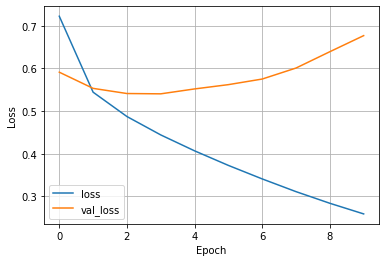

In [31]:
plot_loss(history)

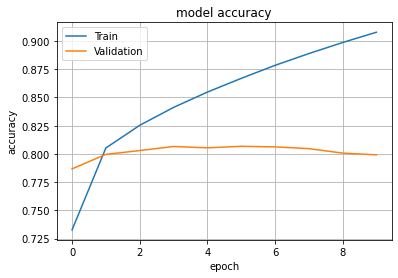

In [33]:
plot_acc(history)

In [35]:
vecto = pickle.load(open("soru1_vectorizer.pickle", "rb"))

In [51]:
y_pred = model1.predict(X_test_padded_docs)

In [67]:
predicted_value = np.argmax(y_pred, axis=1)

In [90]:
def label_decoder(class_idx):
    if class_idx == 0:
        return 'economics'
    if class_idx == 1:
        return 'health'
    if class_idx == 2:
        return 'life'
    if class_idx == 3:
        return 'sports'
    if class_idx == 4:
        return 'technology'

In [93]:
predicted_classes = pd.Series(predicted_value).map(lambda x: label_decoder(x))

In [97]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_test, predicted_classes)

print('Classes: {}'.format(y_test_ohe.columns))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

Classes: Index(['economics', 'health', 'life', 'sports', 'technology'], dtype='object')
precision: [0.73476733 0.81601732 0.72940808 0.93751808 0.80058103]
recall: [0.76814191 0.81707846 0.72402269 0.93436479 0.76929212]
fscore: [0.75108405 0.81654754 0.72670541 0.93593878 0.78462477]
